In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
# Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/URL_Dataset.csv")

In [3]:
from urllib.parse import urlparse
import pandas as pd
import re

# Function to sanitize and extract the domain
def extract_domain(url):
    if pd.isna(url):
        return None  # Handle NaN values
    try:
        # Sanitize the URL by removing invalid characters and normalizing it
        url = str(url).strip()  # Ensure URL is a string and strip any extra spaces
        if not urlparse(url).scheme:
            url = 'http://' + url

        # Basic validation of URL format
        if not re.match(r'^http[s]?://', url):
            return None

        parsed_url = urlparse(url)
        return parsed_url.netloc
    except Exception as e:
        print(f"Error parsing URL {url}: {e}")
        return None

# Apply the function to your URL column and update the dataset
df['domain'] = df['URL'].apply(extract_domain)

# If you want to replace the original URL column with the domain
df.drop('URL', axis=1, inplace=True)

# Save the updated dataset
df.to_csv('updated_dataset.csv', index=False)


Error parsing URL http://ŠRybjUxÙãl5»7ÆE%ÝÔk+h|U+ýk©ìÉ”½“Æq]âF·žõÁ¢w)ëA·ç“°š{t*m!¦2: Invalid IPv6 URL
Error parsing URL http://‡ù”S\óNá”\»‡éíž¹&-nÖE—ÒÞE¶KØý+Š•ƒLƒö’ÝzíÏS&’Ýüì\RïŸq¯QýØ¿yâƒ&1P^z]]‘œß’"Z “>0¾>ér—‘íúŠ>%;W *ÖÏ]† ‡vlÕvoè¯™CÑÑÈÜ~Ì“E×Û¢Þ°8ÖÉw\ôt¤†m–â: Invalid IPv6 URL
Error parsing URL http://˜FtlÓ5»w2p(çt›Xi^T–æŠŒ1wMõò ðsA[êõ\í£Lä:4I Ç1³êV‰ø#Óuü@V6´’Èœ9;¬Z+ ØÐr™RÐ: Invalid IPv6 URL
Error parsing URL http://ÆeF§÷%¶¿ÕŒ½9¿b@Ö¸ÚZE¤ÒC¢˜ŽÄÅª2åç-]W³fU¤Jgkz.ø¿n€Jçåæu‡…øD%@ðûÇùM¹u
 Ë: Invalid IPv6 URL
Error parsing URL http://Ó—6¸RTÃu‹~æ‚ Ùg0>–÷mÖiÓ=;ŸXZ\%êýÜÉfn&‡\°%7õÉ"ieÖ1ÄÁêFÐò<€$cï‡6t[‘0òŸ2ž"ƒ/Æa^2’âpù/ýãÇ$E¬R«È²ú[Ì¶‰p¥qÒ°i°^ò[»³»]±9êdÓS¿•ËŠ]ùþ5j¿»·ªocœÂplà7Ê
 ÏJ§¢#‚3ðDCDõ²çÇGÝ.Vò=¿QB§Ä'`Êá…ZÉê ÔîÆmž®ÍÝQÓ(z;¹Á™–ê¬šâytÖ–Ù®ëž„N”“P²ÜEŽQ: Invalid IPv6 URL
Error parsing URL http://µ“ÔA¨!ÝŒÛ=]›º£¦Pôwr7ƒ2-ÕY5Äòè7¬-³]×=)&¡e¸‹¢À6RD­NvY¨‹Ð«Ñ3Â¸%Qñ+Û“È…¸$¶gz{þ: Invalid IPv6 URL
Error parsing URL http://¨R

In [4]:
import pandas as pd
import math
import collections
import re
from urllib.parse import urlparse

def domain_length(domain):
    return len(domain) if domain else 0

def count_hyphens(domain):
    return domain.count('-') if domain else 0

def shannon_entropy(domain):
    if not domain:
        return 0
    probabilities = [domain.count(c) / len(domain) for c in set(domain)]
    entropy = -sum(p * math.log2(p) for p in probabilities)
    return entropy

def has_dots(domain):
    return int('.' in domain) if domain else 0

def count_dots(domain):
    return domain.count('.') if domain else 0

def has_underline(domain):
    return int('_' in domain) if domain else 0

def count_underlines(domain):
    return domain.count('_') if domain else 0

def has_repeated_digits(domain):
    return int(bool(re.search(r'(\d)\1', domain))) if domain else 0

def has_special_characters(domain):
    return int(bool(re.search(r'[^A-Za-z0-9\.\-_]', domain))) if domain else 0

def has_special_characters(domain):
    return int(bool(re.search(r'[^A-Za-z0-9\.\-_]', domain))) if domain else 0

def count_special_characters(domain):
    return len(re.findall(r'[^A-Za-z0-9\.\-_]', domain)) if domain else 0

def count_subdomains(domain):
    return domain.count('.') if domain else 0

def subdomain_entropy(domain):
    if domain is None or domain == '':
        return 0
    subdomains = domain.split('.')[:-1]  # Exclude the main domain
    if not subdomains:
        return 0
    subdomain_str = ''.join(subdomains)
    return shannon_entropy(subdomain_str)

def avg_subdomain_length(domain):
    if domain is None or domain == '':
        return 0
    subdomains = domain.split('.')[:-1]  # Exclude the main domain
    if not subdomains:
        return 0
    lengths = [len(subdomain) for subdomain in subdomains]
    return sum(lengths) / len(lengths) if lengths else 0

# Apply the functions to the domain column
df['Domain Length'] = df['domain'].apply(domain_length)
df['Hyphens in Domain'] = df['domain'].apply(count_hyphens)
df['Shannon Entropy of Domain'] = df['domain'].apply(shannon_entropy)
df['Having Dots in Domain'] = df['domain'].apply(has_dots)
df['Number of Dots in Domain'] = df['domain'].apply(count_dots)
df['Having Underline in Domain'] = df['domain'].apply(has_underline)
df['Number of Underlines in Domain'] = df['domain'].apply(count_underlines)
df['Having Repeated Digits in Domain'] = df['domain'].apply(has_repeated_digits)
df['Having Special Characters'] = df['domain'].apply(has_special_characters)
df['Number of Special Characters in Domain'] = df['domain'].apply(count_special_characters)
df['Number of Subdomains'] = df['domain'].apply(count_subdomains)
df['Shannon Entropy of Subdomains'] = df['domain'].apply(subdomain_entropy)
df['Average Length of Subdomains'] = df['domain'].apply(avg_subdomain_length)

# Save the updated dataset with the new features
df.to_csv('updated_dataset_with_features.csv', index=False)


In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('updated_dataset_with_features.csv')

# Drop the 'domain' column
df = df.drop(columns=['domain'])

# Map 'Type' column values to 0 and 1
df['Type'] = df['Type'].replace({'Legitimate': 0, 'Phishing': 1})

# Save the updated DataFrame back to CSV
df.to_csv('FinalDataset.csv', index=False)

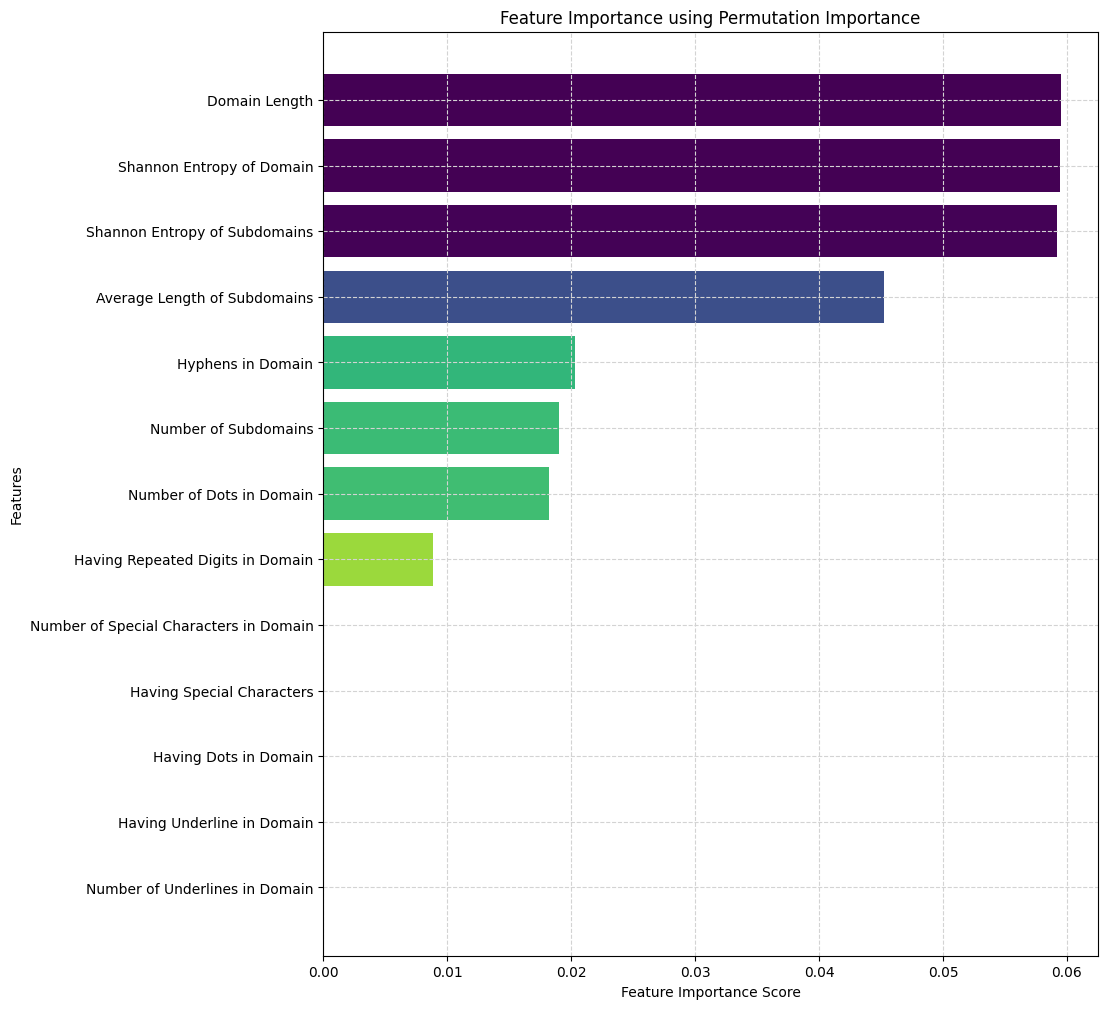

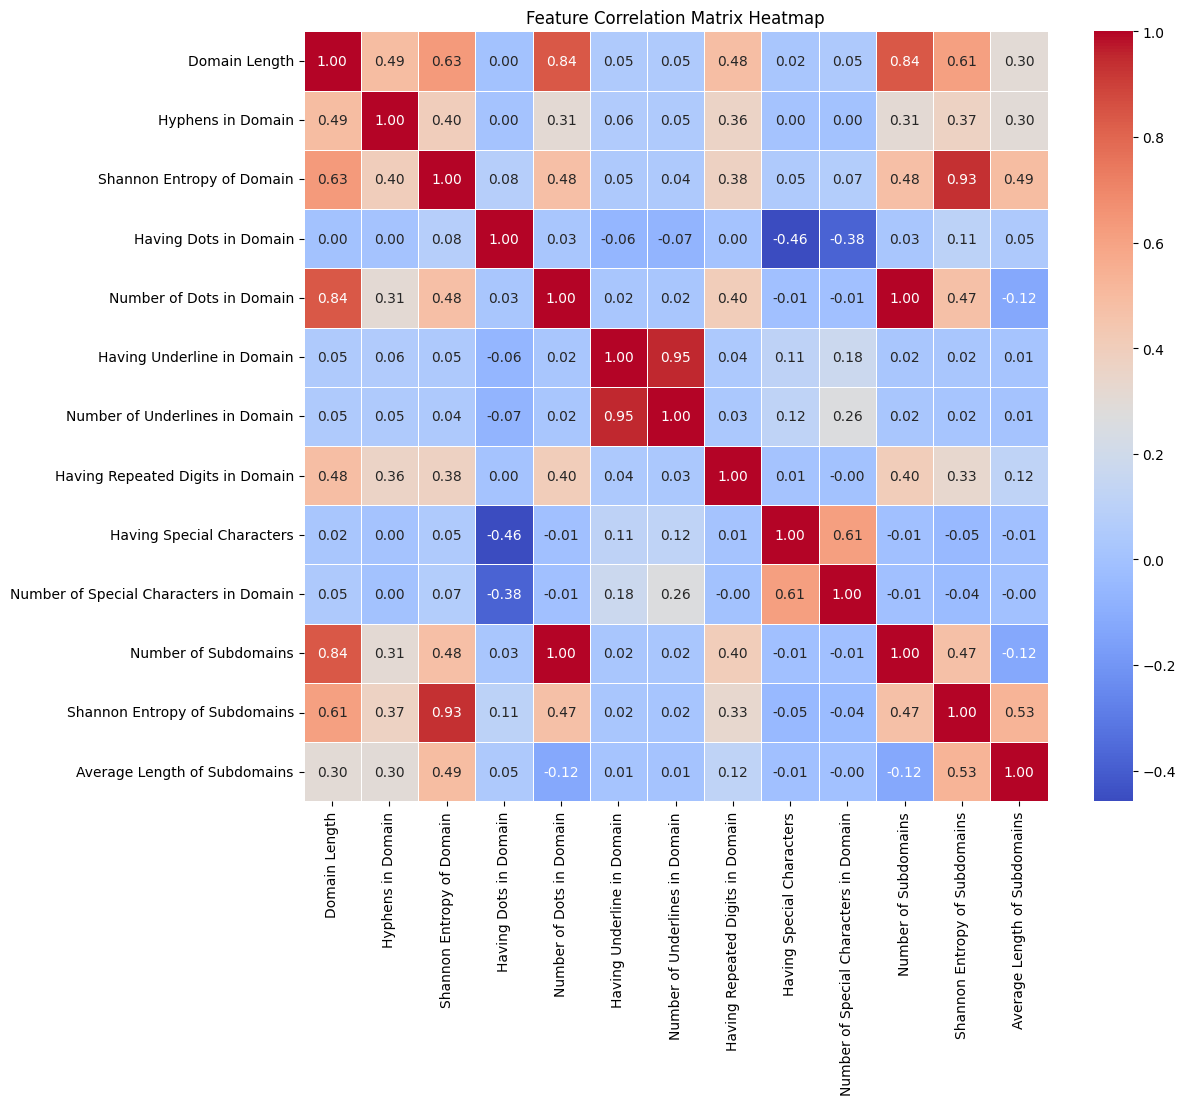

In [6]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Assuming 'data' is your DataFrame
data = pd.read_csv("/content/FinalDataset.csv")

# Splitting data into features (X) and target (y)
X = data.drop("Type", axis=1)
y = data["Type"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier for training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Compute permutation feature importance
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importance
colors = plt.cm.viridis_r(perm_importance.importances_mean[sorted_idx] / max(perm_importance.importances_mean))  # Use viridis colormap for colors
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], color=colors)
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Permutation Importance')
plt.grid(True, color='lightgray', linestyle='--')
plt.show()

# Plot heatmap for the correlation matrix of the features
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix Heatmap')
plt.show()


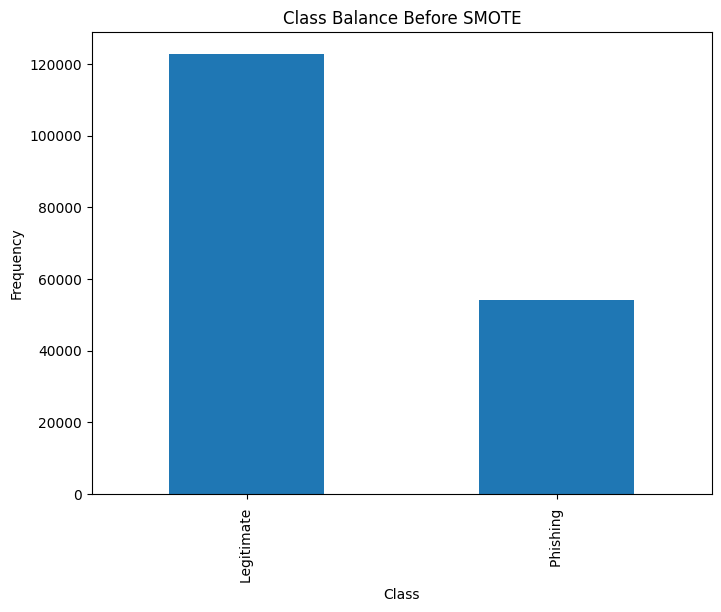

In [7]:
# Visualize the class balance before applying SMOTE
plt.figure(figsize=(8, 6))
y_train.value_counts().plot(kind='bar')
plt.title('Class Balance Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

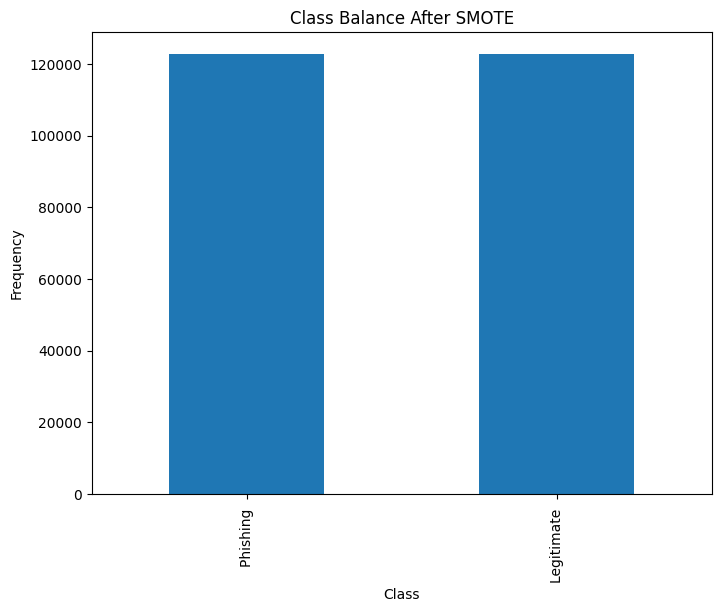

In [8]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize the class balance after applying SMOTE
plt.figure(figsize=(8, 6))
y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Balance After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Combine the resampled X_train and y_train into a new DataFrame
resampled_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Save the final updated dataset to a CSV file
resampled_data.to_csv("/content/Resampled_FinalDataset.csv", index=False)

In [9]:
# Load your dataset into a pandas DataFrame
data = pd.read_csv("/content/Resampled_FinalDataset.csv")

# Strip any leading or trailing spaces and ensure consistent case
data['Type'] = data['Type'].str.strip().str.capitalize()

# Transform the 'Type' column to numerical values
data['Type'] = data['Type'].map({'Phishing': 1, 'Legitimate': 0})

# Splitting data into features (X) and target (y)
X = data.drop("Type", axis=1)
y = data["Type"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.761     0.864     0.810     24405
           1      0.845     0.732     0.785     24696

    accuracy                          0.798     49101
   macro avg      0.803     0.798     0.797     49101
weighted avg      0.803     0.798     0.797     49101

Mean Cross-validation Score (Random Forest): 0.7971
Confusion Matrix:
[[21096  3309]
 [ 6618 18078]]
True Positives: 18078
True Negatives: 21096
False Positives: 3309
False Negatives: 6618
Training Time: 18.1378 seconds
Testing Time: 1.3797 seconds


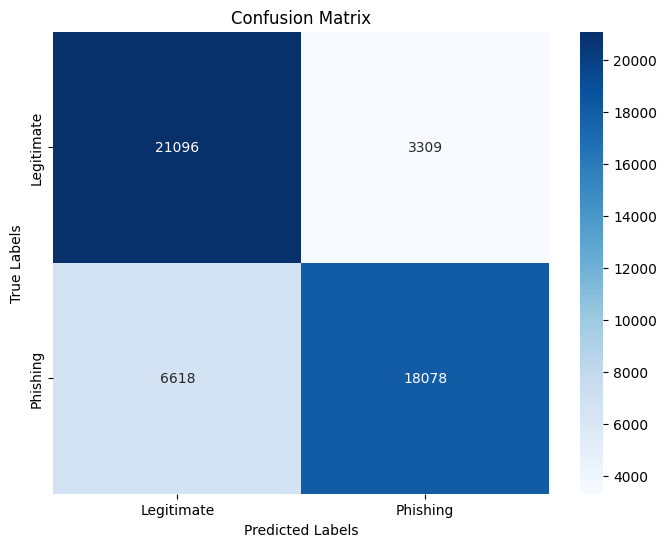

In [10]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Select the top k features based on feature importances
k = 9 # Number of top features to select
selected_features = X.columns[sorted_idx][-k:]

# Train and evaluate the Random Forest classifier with selected features using k-fold cross-validation
rf = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
                            class_weight=None, ccp_alpha=0.0, max_samples=None)

# Record training start time
training_start_time = time.time()
rf.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_rf = rf.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Decision Tree
cv_scores_rf = cross_val_score(rf, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_rf = np.mean(cv_scores_rf)

# Print classification report for the Decision Tree classifier with selected features
print("Random Forest Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_rf, digits=3))
print("Mean Cross-validation Score (Random Forest): {:.4f}".format(mean_cv_score_rf))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Decision Tree Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.747     0.871     0.804     24405
           1      0.848     0.709     0.772     24696

    accuracy                          0.790     49101
   macro avg      0.797     0.790     0.788     49101
weighted avg      0.798     0.790     0.788     49101

Mean Cross-validation Score (Decision Tree): 0.7892
Confusion Matrix:
[[21260  3145]
 [ 7190 17506]]
True Positives: 17506
True Negatives: 21260
False Positives: 3145
False Negatives: 7190
Training Time: 0.5998 seconds
Testing Time: 0.0170 seconds


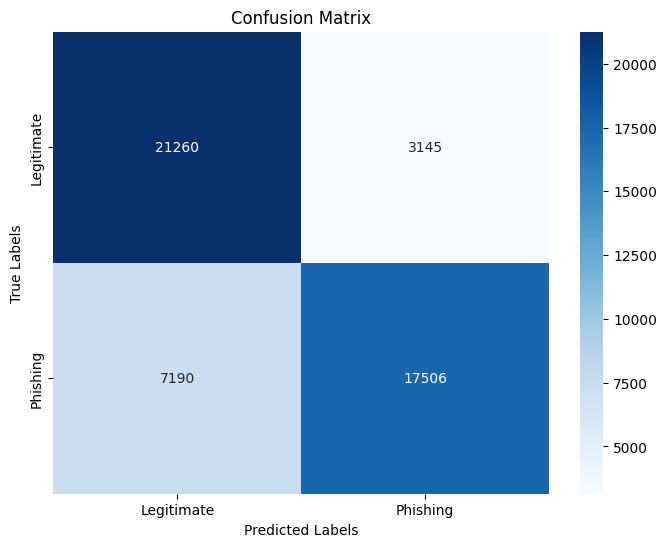

In [11]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,  confusion_matrix

# Record start time
start_time = time.time()

# Select the top k features based on feature importances
k = 35  # Number of top features to select
selected_features = X.columns[sorted_idx][-k:]

# Train and evaluate the Decision Tree classifier with selected features using k-fold cross-validation
dt = DecisionTreeClassifier()

# Record training start time
training_start_time = time.time()
dt.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_dt = dt.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Decision Tree
cv_scores_dt = cross_val_score(dt, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_dt = np.mean(cv_scores_dt)

# Print classification report for the Decision Tree classifier with selected features
print("Decision Tree Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_dt, digits=3))
print("Mean Cross-validation Score (Decision Tree): {:.4f}".format(mean_cv_score_dt))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Gaussian Naive Bayes Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.542     0.987     0.700     24405
           1      0.931     0.177     0.298     24696

    accuracy                          0.580     49101
   macro avg      0.737     0.582     0.499     49101
weighted avg      0.738     0.580     0.498     49101

Mean Cross-validation Score (Gaussian Naive Bayes): 0.5901
Confusion Matrix:
[[24083   322]
 [20320  4376]]
True Positives: 4376
True Negatives: 24083
False Positives: 322
False Negatives: 20320
Training Time: 0.0590 seconds
Testing Time: 0.0099 seconds


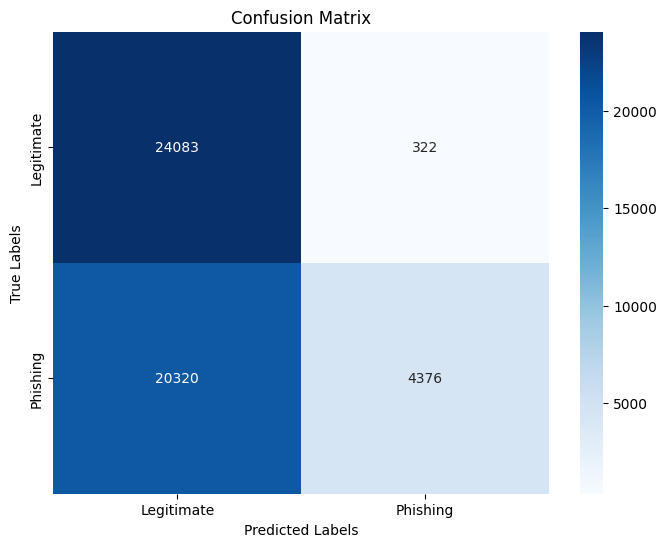

In [12]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Record start time
start_time = time.time()

# Train and evaluate the Gaussian Naive Bayes classifier with selected features using k-fold cross-validation
gnb = GaussianNB()

# Record training start time
training_start_time = time.time()
gnb.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_gnb = gnb.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Gaussian Naive Bayes
cv_scores_gnb = cross_val_score(gnb, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_gnb = np.mean(cv_scores_gnb)

# Print classification report for the Gaussian Naive Bayes classifier with selected features
print("Gaussian Naive Bayes Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_gnb, digits=3))
print("Mean Cross-validation Score (Gaussian Naive Bayes): {:.4f}".format(mean_cv_score_gnb))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

SGDClassifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.692     0.704     0.698     24405
           1      0.702     0.691     0.696     24696

    accuracy                          0.697     49101
   macro avg      0.697     0.697     0.697     49101
weighted avg      0.697     0.697     0.697     49101

Mean Cross-validation Score (SGDClassifier): 0.6766
Confusion Matrix:
[[17179  7226]
 [ 7643 17053]]
True Positives: 17053
True Negatives: 17179
False Positives: 7226
False Negatives: 7643
Training Time: 2.3362 seconds
Testing Time: 0.0034 seconds


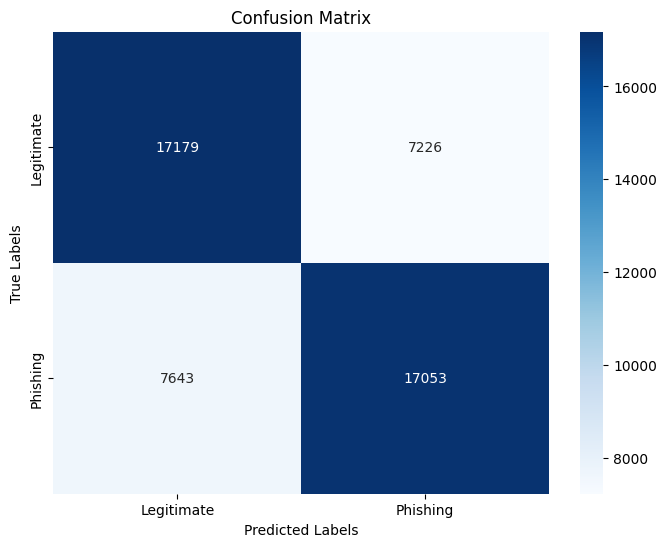

In [13]:
import time
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Record start time
start_time = time.time()

# Train and evaluate the SGDClassifier with selected features using k-fold cross-validation
sgd_clf = SGDClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
sgd_clf.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_sgd = sgd_clf.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for SGDClassifier
cv_scores_sgd = cross_val_score(sgd_clf, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_sgd = np.mean(cv_scores_sgd)

# Print classification report for the SGDClassifier with selected features
print("SGDClassifier with Selected Features Report:")
print(classification_report(y_test, y_pred_sgd, digits=3))
print("Mean Cross-validation Score (SGDClassifier): {:.4f}".format(mean_cv_score_sgd))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_sgd)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Extra Trees Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.759     0.873     0.812     24405
           1      0.853     0.726     0.784     24696

    accuracy                          0.799     49101
   macro avg      0.806     0.799     0.798     49101
weighted avg      0.806     0.799     0.798     49101

Mean Cross-validation Score (Extra Trees): 0.7997
Confusion Matrix:
[[21310  3095]
 [ 6773 17923]]
True Positives: 17923
True Negatives: 21310
False Positives: 3095
False Negatives: 6773
Training Time: 11.9286 seconds
Testing Time: 1.3557 seconds


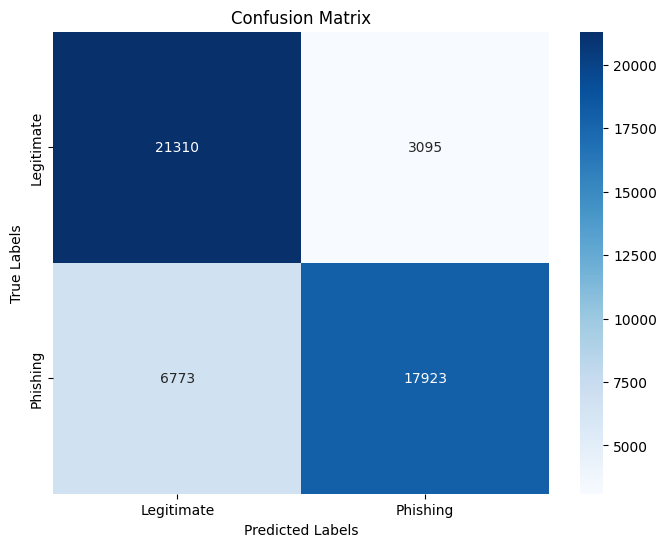

In [14]:
import time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np

# Record start time
start_time = time.time()

# Train and evaluate the Extra Trees Classifier with selected features using k-fold cross-validation
etc = ExtraTreesClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
etc.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_etc = etc.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Extra Trees Classifier
cv_scores_etc = cross_val_score(etc, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_etc = np.mean(cv_scores_etc)

# Print classification report for the Extra Trees Classifier with selected features
print("Extra Trees Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_etc, digits=3))
print("Mean Cross-validation Score (Extra Trees): {:.4f}".format(mean_cv_score_etc))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_etc)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

MLP Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.692     0.808     0.746     24405
           1      0.773     0.645     0.703     24696

    accuracy                          0.726     49101
   macro avg      0.732     0.726     0.724     49101
weighted avg      0.733     0.726     0.724     49101

Mean Cross-validation Score (MLP): 0.7219
Confusion Matrix:
[[19728  4677]
 [ 8778 15918]]
True Positives: 15918
True Negatives: 19728
False Positives: 4677
False Negatives: 8778
Training Time: 428.4731 seconds
Testing Time: 0.1981 seconds


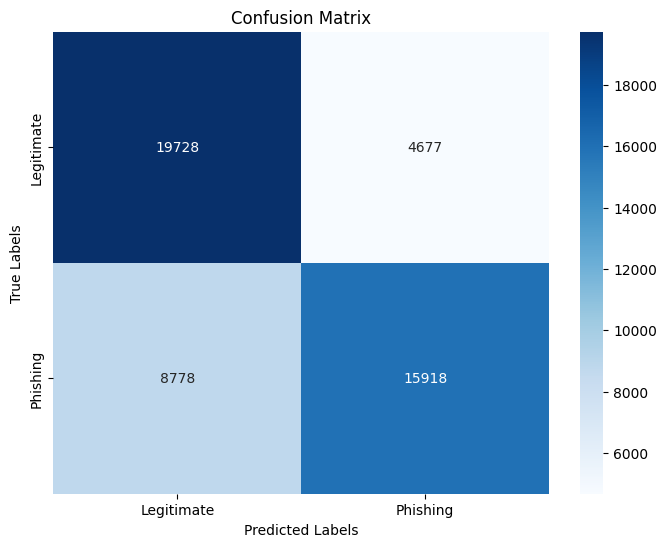

In [15]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Record start time
start_time = time.time()

# Train and evaluate the MLP Classifier with selected features using k-fold cross-validation
mlp = MLPClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
mlp.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_mlp = mlp.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for MLP Classifier
cv_scores_mlp = cross_val_score(mlp, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_mlp = np.mean(cv_scores_mlp)

# Print classification report for the MLP Classifier with selected features
print("MLP Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_mlp, digits=3))
print("Mean Cross-validation Score (MLP): {:.4f}".format(mean_cv_score_mlp))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

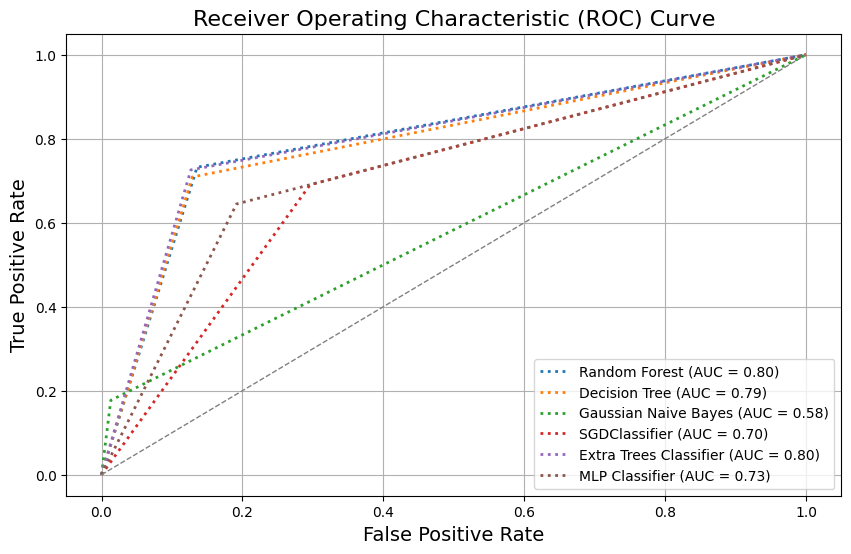

In [16]:
# Compute ROC curve and AUC for each classifier

#RF
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# DT
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(fpr_gnb, tpr_gnb)

# SGDClassifier
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_pred_sgd)
auc_sgd = auc(fpr_sgd, tpr_sgd)

# Extra Trees Classifier
fpr_etc, tpr_etc, _ = roc_curve(y_test, y_pred_etc)
auc_etc = auc(fpr_etc, tpr_etc)

# MLP Classifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
auc_mlp = auc(fpr_mlp, tpr_mlp)


# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes (AUC = {auc_gnb:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_sgd, tpr_sgd, label=f'SGDClassifier (AUC = {auc_sgd:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_etc, tpr_etc, label=f'Extra Trees Classifier (AUC = {auc_etc:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP Classifier (AUC = {auc_mlp:.2f})', linewidth=2, linestyle=':')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

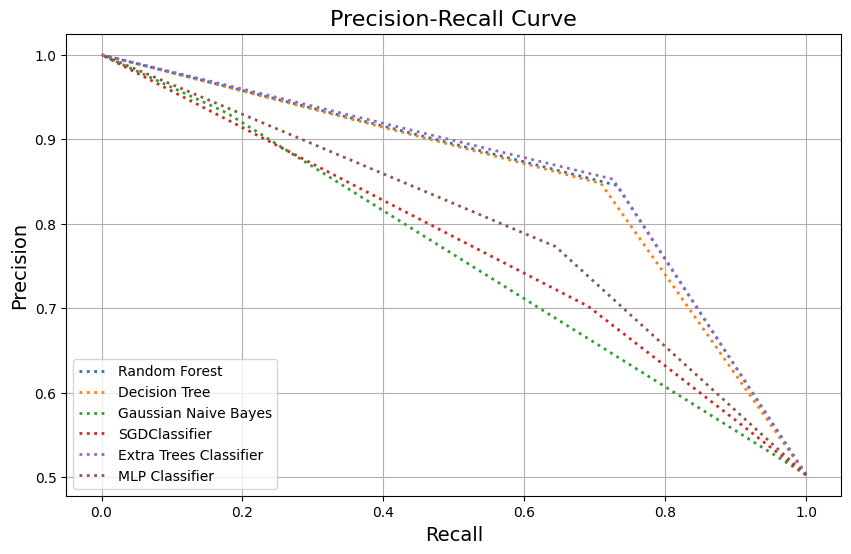

In [17]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt


# Assuming precision and recall values for each classifier are calculated as follows:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_dt)
precision_gnb, recall_gnb, _ = precision_recall_curve(y_test, y_pred_gnb)
precision_sgd, recall_sgd, _ = precision_recall_curve(y_test, y_pred_sgd)
precision_etc, recall_etc, _ = precision_recall_curve(y_test, y_pred_etc)
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, y_pred_mlp)

# Plot precision-recall curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest', linewidth=2, linestyle=':')
plt.plot(recall_dt, precision_dt, label=f'Decision Tree', linewidth=2, linestyle=':')
plt.plot(recall_gnb, precision_gnb, label=f'Gaussian Naive Bayes', linewidth=2, linestyle=':')
plt.plot(recall_sgd, precision_sgd, label=f'SGDClassifier', linewidth=2, linestyle=':')
plt.plot(recall_etc, precision_etc, label=f'Extra Trees Classifier', linewidth=2, linestyle=':')
plt.plot(recall_mlp, precision_mlp, label=f'MLP Classifier', linewidth=2, linestyle=':')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower left')
plt.grid(True)
plt.show()
